# OCR (Optical Character Recognition)

### "Extract text from images or documents." 

### These are the topics discussed below:
### 1) Keras OCR
### 2) Easy OCR
### 3) Pytesseract

### Installing Libraries

In [1]:
from IPython.display import clear_output
!pip install keras-ocr
clear_output()

In [2]:
from IPython.display import clear_output
!pip install pytesseract
clear_output()

In [3]:
from IPython.display import clear_output
!pip install easyocr
clear_output()

### Import necessary Libraries

In [4]:
import pytesseract
import keras_ocr
import easyocr
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### Test Images

In [5]:
url = [
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image1.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image2.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image3.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image4.png"
]
images = [ keras_ocr.tools.read(i) for i in url]

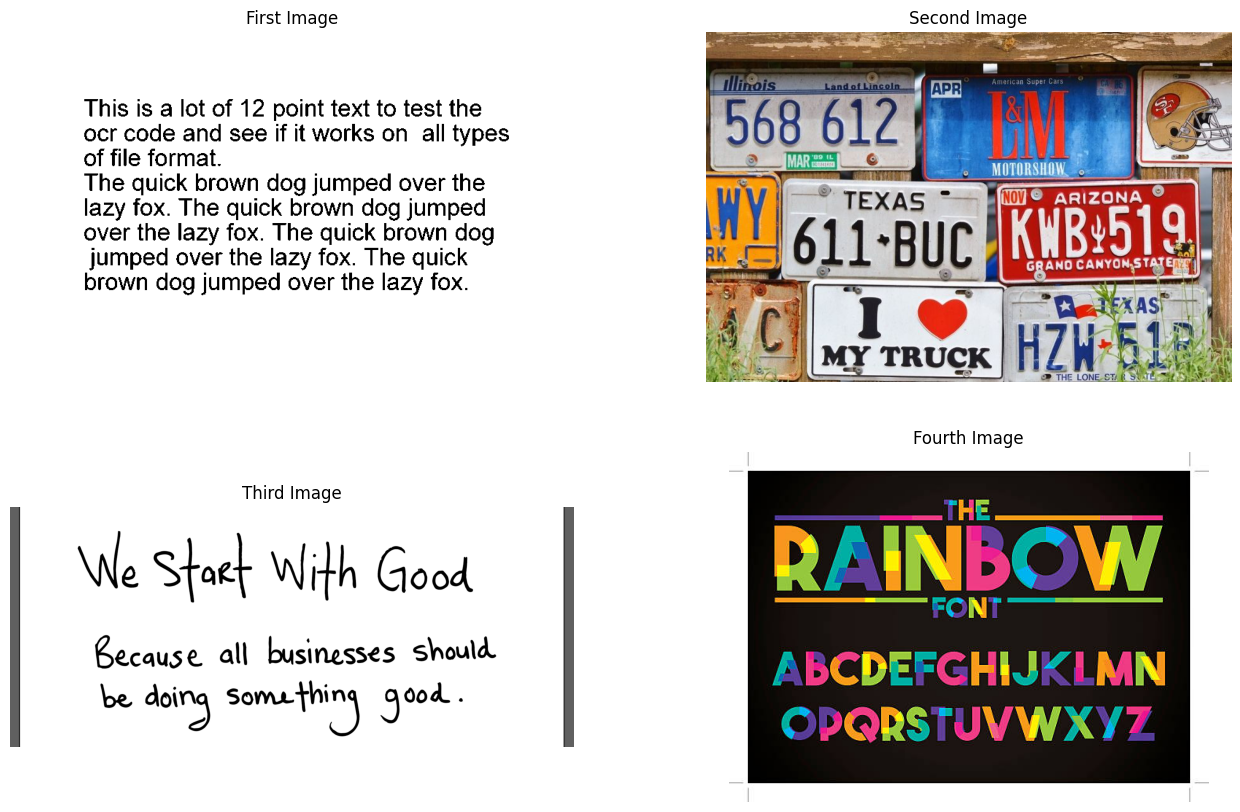

In [6]:
fig = plt.figure(figsize=(16,10))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(images[0])
plt.axis('off')
plt.title("First Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(images[1])
plt.axis('off')
plt.title("Second Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(images[2])
plt.axis('off')
plt.title("Third Image")

fig.add_subplot(rows, columns, 4)
plt.imshow(images[3])
plt.axis('off')
plt.title("Fourth Image");

## Keras_OCR

In [7]:
pipline = keras_ocr.pipeline.Pipeline() #Creting a pipline 
kerasocr_preds = pipline.recognize(images)

Looking for C:\Users\Moni\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Moni\.keras-ocr\crnn_kurapan.h5
4/4 [==============================] - 15s 3s/step


## Results of Keras_OCR
### Keras-ocr plots boxes of detected text with annotations on the input image.

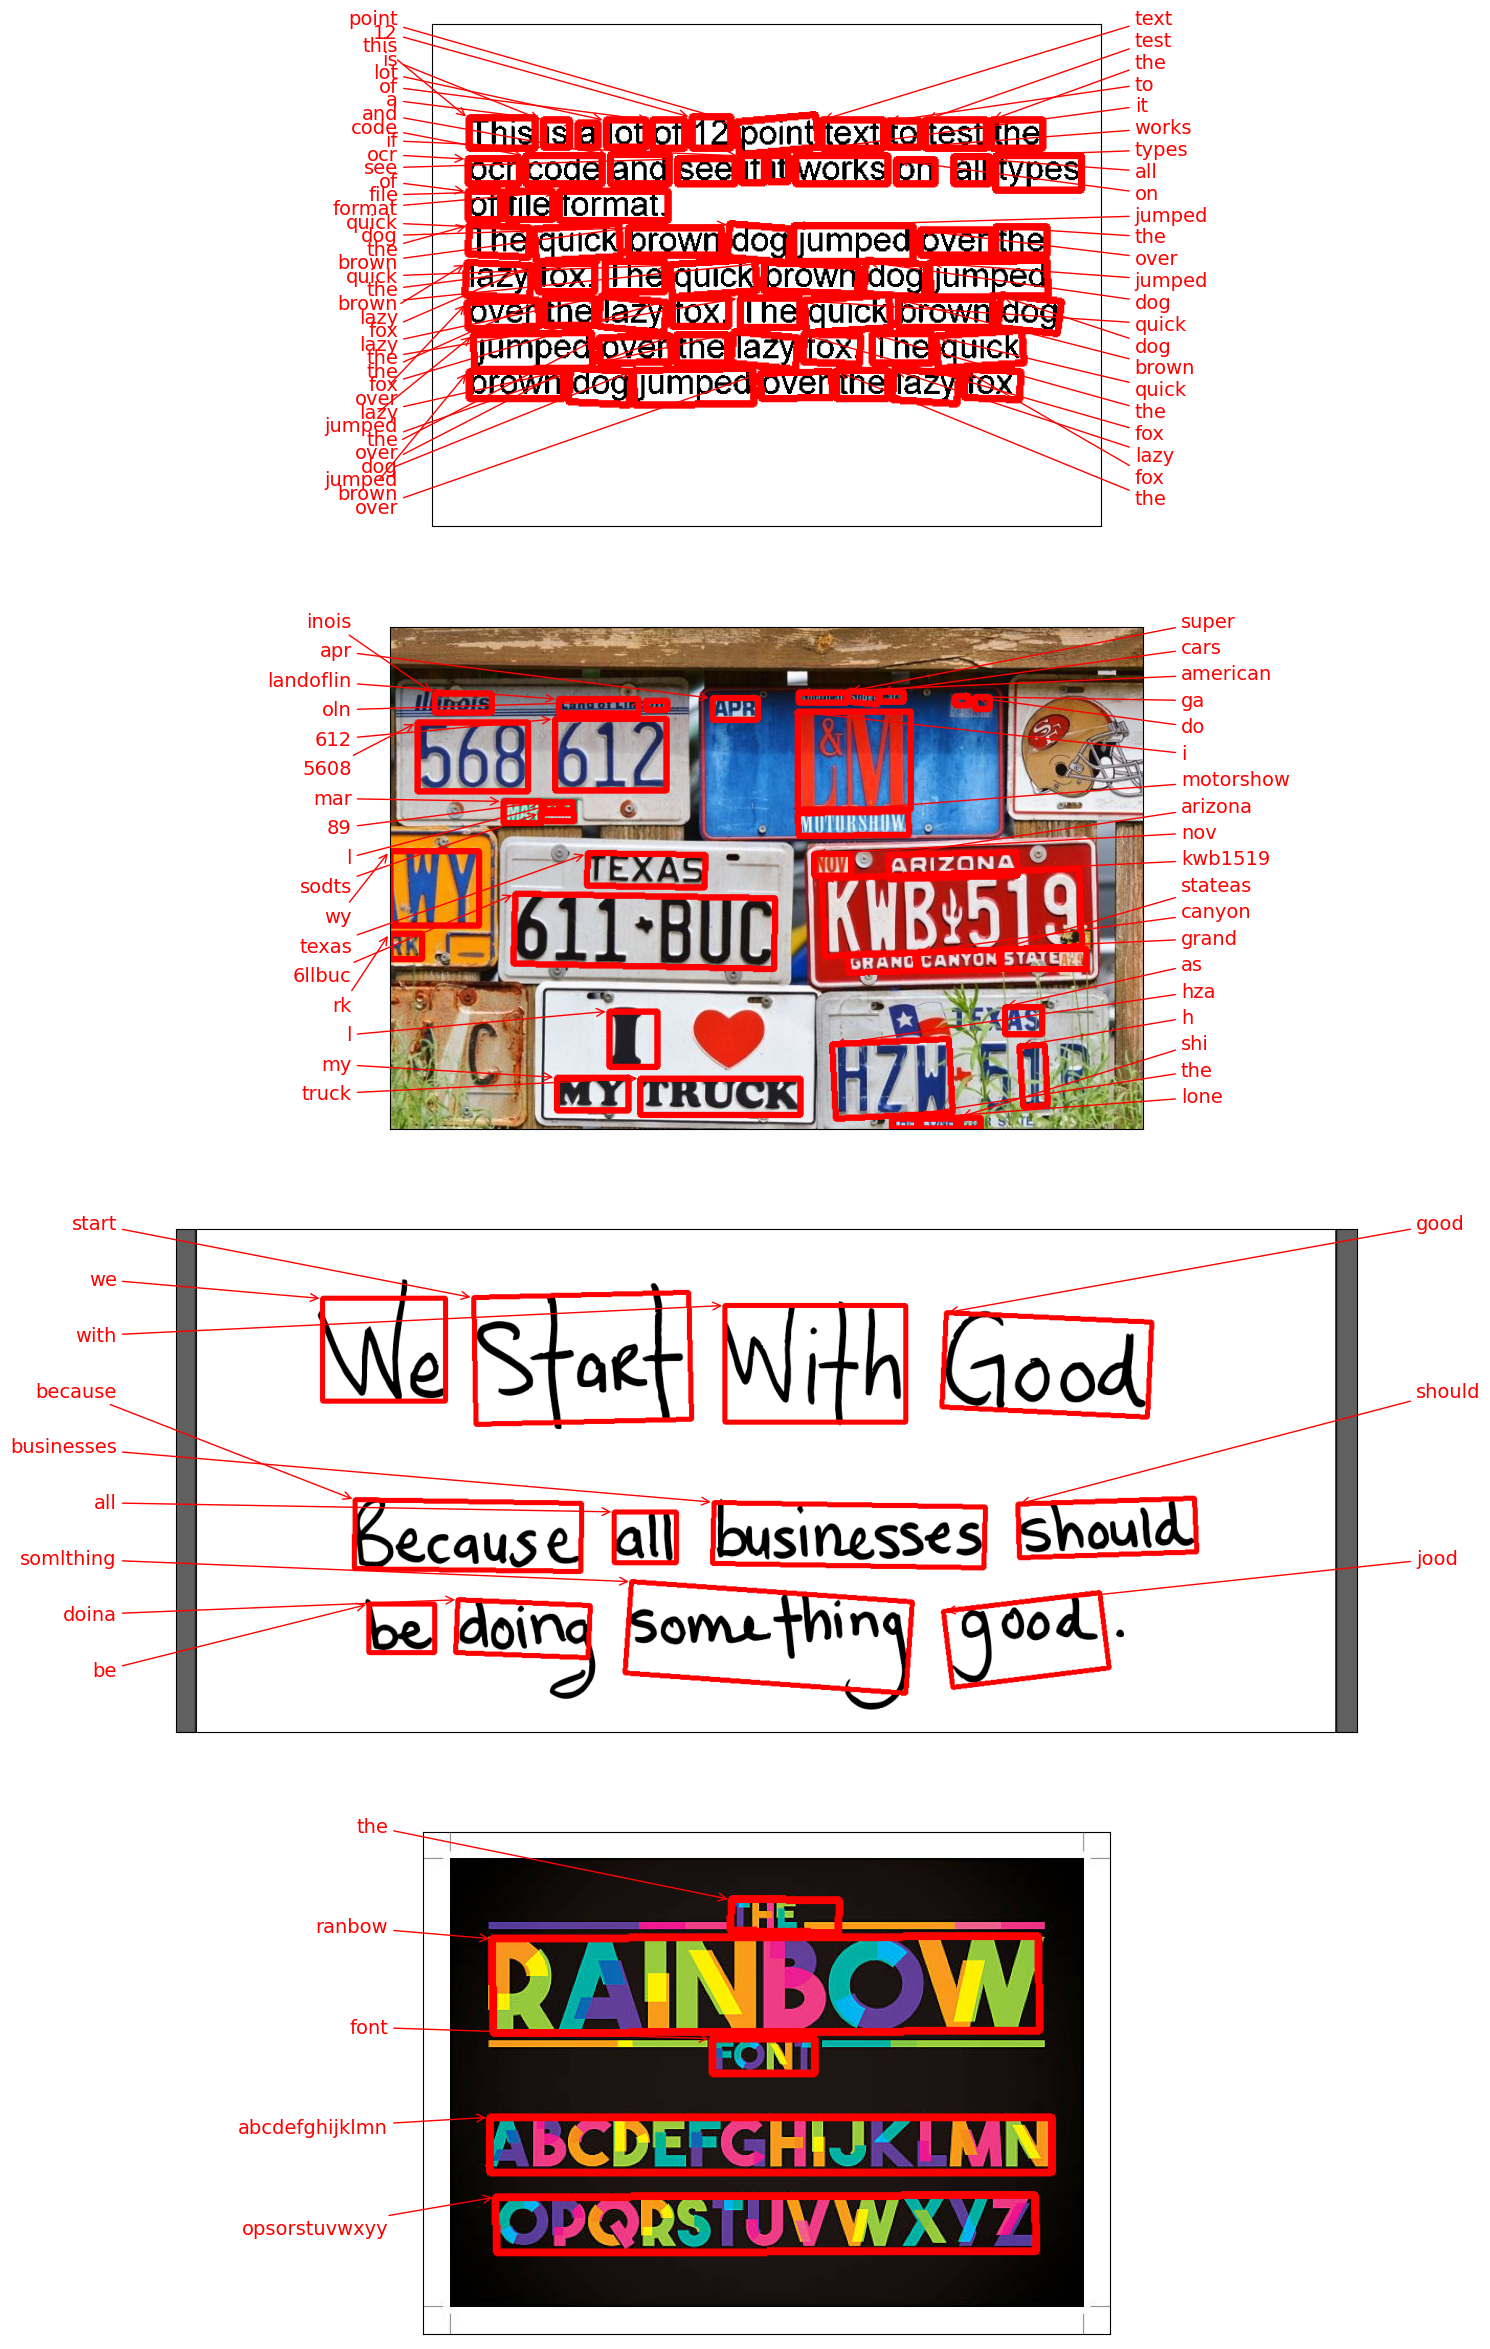

In [8]:
fig,axs = plt.subplots(nrows = 4 , figsize = (30,30))
for ax , image,  prediction in zip(axs , images , kerasocr_preds):
    keras_ocr.tools.drawAnnotations(image, prediction, ax)

## Easy_OCR

In [9]:
text_reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## Results of Easy_OCR

### First Image

This is a lot of 12 point text to test the
ocr code and see if it works on
all types
of file format:
The quick brown dog jumped over the
lazy fox The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


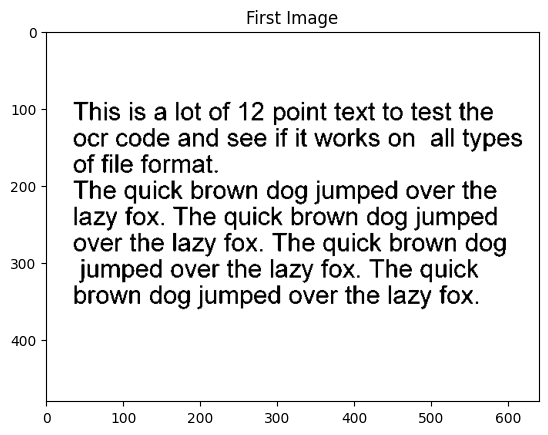

In [10]:
results = text_reader.readtext(images[0] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[0])
plt.title("First Image");

### Second Image

Iigis
LandehLincoln 
American Super Cars
APR
568 612
DM
'B9rIL
MAR
Wenn
MOTORSHOW
TEXAS
no
ARizONA
MY
RK
611*BUC |KLB 519]
GPANOCANYON staten
KAS
MY TRUCK
HZI
THE LONE SH


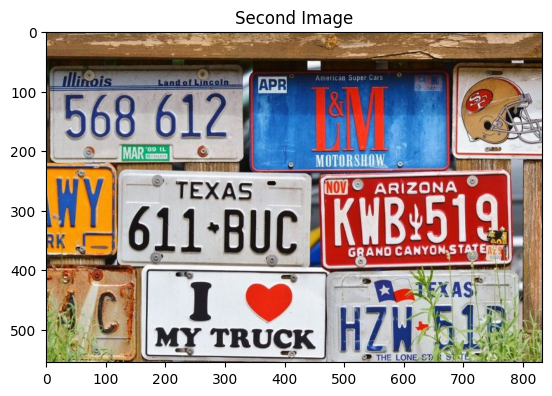

In [11]:
results = text_reader.readtext(images[1] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[1])
plt.title("Second Image");

### Third Image

We Sfart Wifh Good
Because
all
businesses
should
be
doinq
somathin)
9od


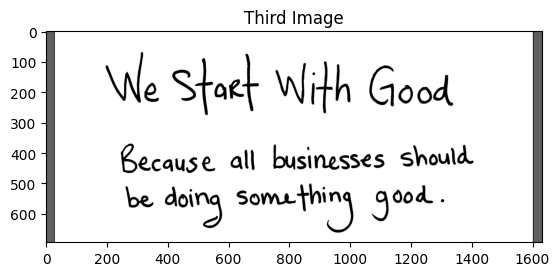

In [14]:
results = text_reader.readtext(images[2] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[2])
plt.title("Third Image");

### Fourth Image

THE
RANBOW
FONT
ABCDEFGHIJKLMN
OPQRSTUVWXYZ


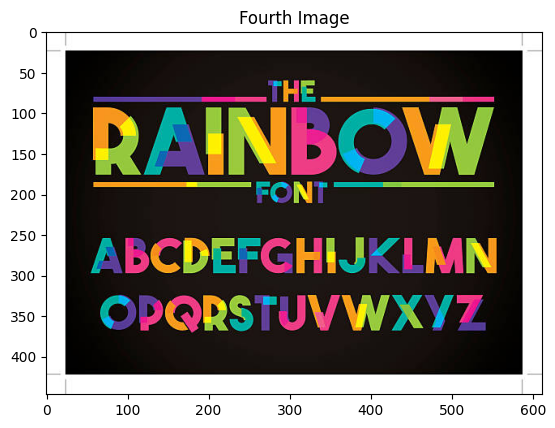

In [15]:
results = text_reader.readtext(images[3] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[3])
plt.title("Fourth Image");

## Pytesseract

In [16]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Users\Moni\AppData\Local\Tesseract-OCR\tesseract.exe' 
tesseract_preds = []
for img in images:
    tesseract_preds.append(pytesseract.image_to_string(img))

## Results of Pytesseract

### Image 1

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



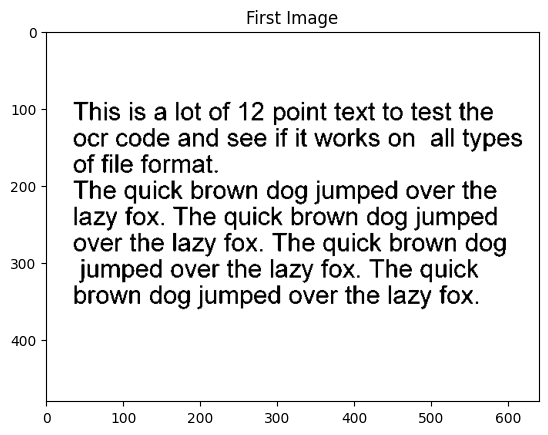

In [17]:
print(tesseract_preds[0])
plt.imshow(images[0])
plt.title("First Image");

### Image 2

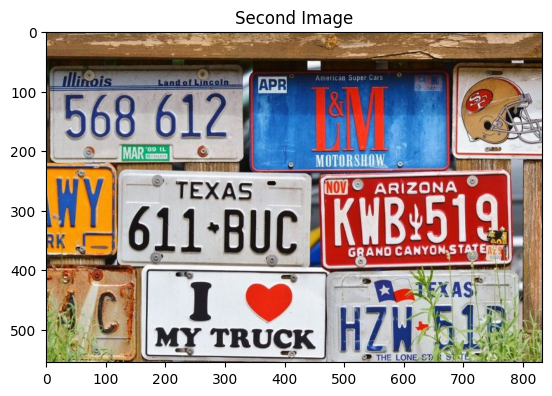

In [18]:
print(tesseract_preds[1])
plt.imshow(images[1])
plt.title("Second Image");

### Image 3

\Ne Staet With Good

Because all businesses should
be doing Soma thing good.



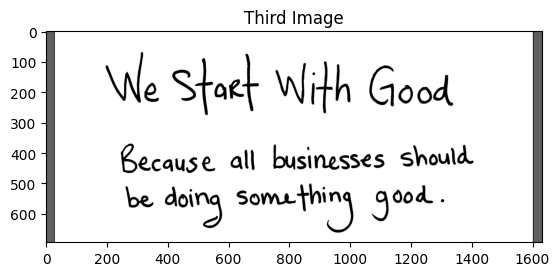

In [19]:
print(tesseract_preds[2])
plt.imshow(images[2])
plt.title("Third Image");

### Image 4

ABCDEFGHIJKLM
OPQRSTUVWKXYZ

 



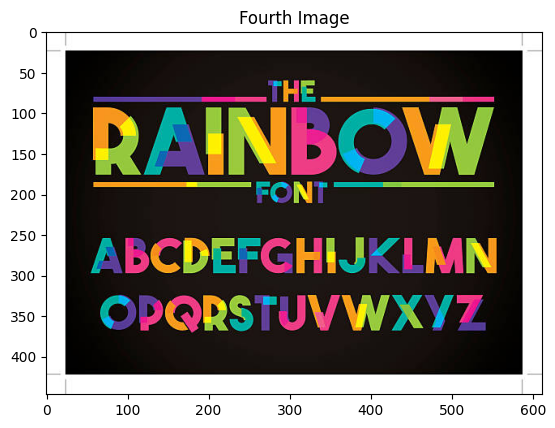

In [20]:
print(tesseract_preds[3])
plt.imshow(images[3])
plt.title("Fourth Image");